In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [58]:
data = pd.read_csv('Data.csv')
data_pred = pd.read_csv('database.csv')

In [59]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [60]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [61]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [62]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [63]:
y=data['Tool wear\nTWmax']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
RF=RandomForestRegressor()
RF= RF.fit(X_train , y_train)


In [72]:
print('Accuracy score on Test data= {:.4f}'.format(RF.score(X_test, y_test)))
RF_k=RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = "sqrt" , max_depth = 50, bootstrap = True)
cv = KFold(n_splits=10)
scores = cross_val_score(RF_k, data_pred.drop(['Tool wear\nTWmax'], axis=1), data_pred['Tool wear\nTWmax'], cv=cv)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
print(scores)
pred=RF.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Accuracy score on Test data= 0.8066
Accuracy: 100.00% (0.00%)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Testing performance
RMSE: 0.03
R2: 0.81


In [34]:
pred=RF.predict(X_test)
comparison=pd.DataFrame()
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred
#comparison.to_csv(r'random_forest.csv', index = False, header=True)

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   44.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
print(rf_random.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
RF=RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = "sqrt" , max_depth = 50, bootstrap = True)
RF= RF.fit(X_train , y_train)
print('Accuracy score on Test data= {:.4f}'.format(RF.score(X_test, y_test)))
pred=RF.predict(X_test)

Accuracy score on Test data= 0.9522


In [75]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred
comparison['Std']=comparison.std(axis=1)

In [76]:
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.5f}".format(rmse))
print("R2: {:.5f}".format(r2))

Testing performance
RMSE: 0.01465
R2: 0.95223


In [77]:
scores = cross_val_score(RF, X, y, cv=6)
print(scores)

[0.99750381 0.99288693 0.9932481  0.9929184  0.99563637 0.99057699]


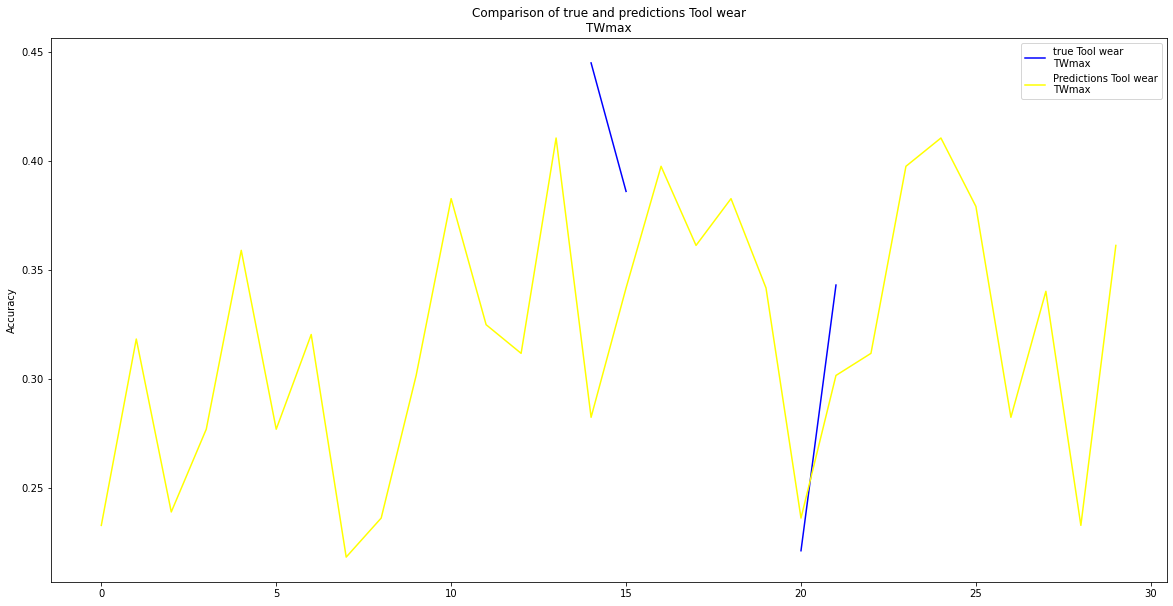

In [78]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [58]:
comparison.to_csv(r'hyper_random_forest.csv', index = False, header=True)
print(comparison)

    True Tool wear\nTWmax  Predicted Tool wear\nTWmax       Std
37                  0.324                    0.320620  0.002390
62                  0.213                    0.236325  0.016493
26                  0.415                    0.412560  0.001725
41                  0.286                    0.284240  0.001245
35                  0.213                    0.236325  0.016493
25                  0.360                    0.361110  0.000785
36                  0.445                    0.398910  0.032591
33                  0.311                    0.317665  0.004713
77                  0.379                    0.382825  0.002705
21                  0.340                    0.335580  0.003125
85                  0.316                    0.320320  0.003055
50                  0.379                    0.382825  0.002705
92                  0.330                    0.325565  0.003136
69                  0.260                    0.267210  0.005098
96                  0.260               